<a href="https://colab.research.google.com/github/samnar2017/2023Python-Project1/blob/main/LagData1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataframe
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv' , index_col=0)
# Grouping the dataframe by 'School Name' and excluding the group containing NaN values
df1 = df.groupby('School Name').filter(lambda x: x['School Name'].notna().all())
# Getting unique group names 
group = df1['School Name'].unique()
# Selecting a random group name
random_group = random.choice(group)
# Extracting all rows from the selected group, as this is going to be our initial comparison point 
result = df1[df1['School Name'] == random_group]
#Exrtracting the remaing groups 
result2 = df1[df1['School Name'] != random_group]
# Displaying two date frames side by side 
display(result, result2)

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,Common Core Algebra,2015,30,78.7,0,0,30,100,9,30,30,100
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,Common Core Algebra,2016,33,87.5,0,0,33,100,31,93.9,33,100
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,Common Core Algebra,2017,30,88.7,0,0,30,100,30,100,30,100
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,Living Environment,2016,30,84.9,0,0,30,100,26,86.7,na,na
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,Living Environment,2017,34,81.7,0,0,34,100,20,58.8,na,na
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,U.S. History and Government,2015,55,86.9,2,3.6,53,96.4,44,80,na,na
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,U.S. History and Government,2016,40,90.5,0,0,40,100,36,90,na,na
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,U.S. History and Government,2017,35,85.6,1,2.9,34,97.1,27,77.1,na,na
31R063,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,Common Core Algebra,2015,30,78.7,0,0,30,100,9,30,30,100


In [146]:
#Let's pick a feature - number of rows each school has or number of rows we have in our randomly selected group and the rest of the groups: 
a = result.shape[0]
b = result2.shape[0]
display(a,b)

83

212248

In [147]:
#We can also be more specific and get the size of each group in groups outside the randomly selected group: 
remaining_grouped = df.loc[~df.index.isin(result.index)].groupby('School Name')
remaining_group_counts = remaining_grouped.size().reset_index(name='Counts')
remaining_group_counts.rename(columns={'index': 'School Name'}, inplace = True)
remaining_group_counts

,School Name,Counts
0,47 The American Sign Language and English Seco...,356
1,A. Philip Randolph Campus High School,459
2,ACORN Community High School,364
3,Abraham Lincoln High School,480
4,Abraham Lincoln Yabc,248
5,Academy For Personal Leadership And Excellence,61
6,Academy for Careers in Television and Film,447
7,Academy for College Preparation and Career Exp...,388
8,Academy for Conservation and the Environment,399
9,Academy for Environmental Leadership,343


In [151]:
#we can also merge these two groups 
included_grouped = df1.loc[df1.index.isin(result.index)].groupby('School Name')
included_group_counts = included_grouped.size().reset_index(name='Counts')
included_group_counts.rename(columns={'index': 'School Name'}, inplace = True)
included_group_counts
concat = pd.concat([included_group_counts,remaining_group_counts])
new_data = concat.reset_index(drop=True)
new_data

,School Name,Counts
0,Marsh Avenue School for Expeditionary Learning,83
1,47 The American Sign Language and English Seco...,356
2,A. Philip Randolph Campus High School,459
3,ACORN Community High School,364
4,Abraham Lincoln High School,480
5,Abraham Lincoln Yabc,248
6,Academy For Personal Leadership And Excellence,61
7,Academy for Careers in Television and Film,447
8,Academy for College Preparation and Career Exp...,388
9,Academy for Conservation and the Environment,399


In [152]:
#Then we can find the average, the median, the smallest and biggest value in the Count column to see where our randomly selected group is situated 
min_value = remaining_group_counts['Counts'].min()
max_value = remaining_group_counts['Counts'].max()
avg_value = round(remaining_group_counts['Counts'].sum() / remaining_group_counts['Counts'].count(), 2) 
median_value = round(remaining_group_counts['Counts'].median(), 2)
dictionary = {'Number of rows in the randomly selected group or included group': a, 'Number of rows in the remaining groups': b, 'min_value': min_value, 'max_value': max_value, 'avg_value': avg_value, 'median_value': median_value}
for key, value in dictionary.items():
  print(f"{key}: {value}")

Number of rows in the randomly selected group or included group: 83
Number of rows in the remaining groups: 212248
min_value: 5
max_value: 1337
avg_value: 209.94
median_value: 184.0


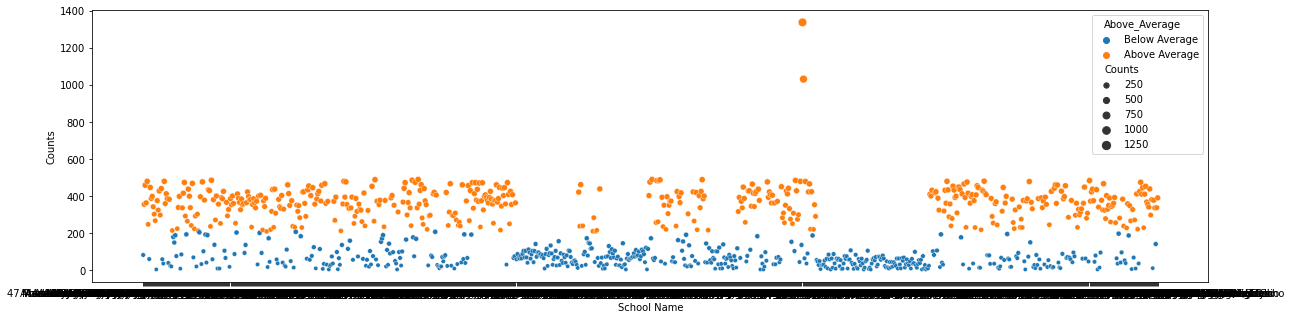

In [174]:
# Let's create a bubble chart with the x-axis split into two sections, one above the average and one below. For that we shall reate a new column in the dataframe to indicate whether each value is above or below the average:
new_data['Above_Average'] = new_data['Counts'].apply(lambda x: 'Above Average' if x >= avg_value else 'Below Average')
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x='School Name', y='Counts', size='Counts', hue='Above_Average', data=new_data, ax=ax)
plt.show()